## IMPLEMENTING XOR 


Predictions: [0 1 1 0]
True Labels: [0 1 1 0]
Training Accuracy: 100.00%


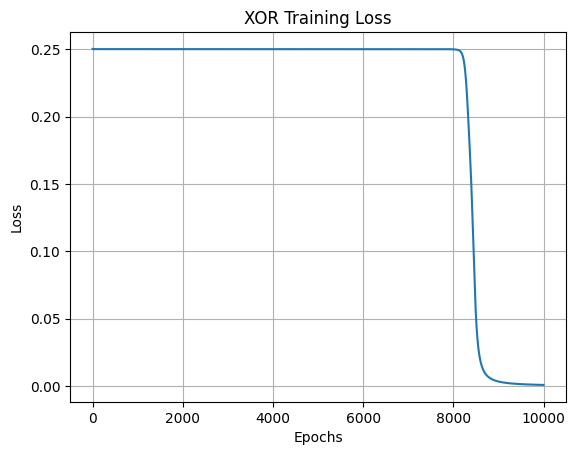

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------
# Data for XOR gate
# -------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])  # Inputs
y = np.array([[0],
              [1],
              [1],
              [0]])     # XOR Outputs

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights
np.random.seed(42)  # Reproducibility
W1 = np.random.randn(2, 4) * 0.1   # 2->4 hidden layer
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1) * 0.1   # 4->1 output layer
b2 = np.zeros((1, 1))

# Hyperparameters
lr = 1.0         # Larger learning rate for fast convergence
epochs = 10000
loss_history = []

# -------------------
# Training loop
# -------------------
for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Compute loss (MSE)
    loss = np.mean((y - a2)**2)
    loss_history.append(loss)

    # Backpropagation
    error_output = (a2 - y) * sigmoid_derivative(a2)
    error_hidden = error_output @ W2.T * sigmoid_derivative(a1)

    # Weight updates
    W2 -= lr * a1.T @ error_output
    b2 -= lr * np.sum(error_output, axis=0, keepdims=True)
    W1 -= lr * X.T @ error_hidden
    b1 -= lr * np.sum(error_hidden, axis=0, keepdims=True)

# -------------------
# Evaluation
# -------------------
final_outputs = sigmoid(sigmoid(X @ W1 + b1) @ W2 + b2)
predictions = (final_outputs > 0.5).astype(int)
accuracy = np.mean(predictions == y) * 100

print("Predictions:", predictions.ravel())
print("True Labels:", y.ravel())
print(f"Training Accuracy: {accuracy:.2f}%")

# -------------------
# Loss curve plot
# -------------------
plt.plot(loss_history)
plt.title("XOR Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
